# 딥 러닝의 학습 방법
* 손실 함수, 옵티마이저, 에포크의 개념에 대해 정리

## 1. 손실 함수: Loss function
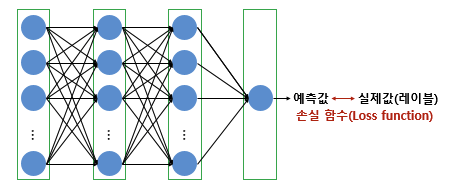
* 회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다.

### 1. MSE: Mean Squared Error

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

### 2. 이진 크로스 엔프로피: Binary Cross-Entropy

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

### 3. 카테고리칼 크로스 엔트로피: Categorical Cross-Entropy
* 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류일 경우 categorical_crossentropy를 사용합니다.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

In [ ]:
# 만약 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면 다음과 같이 'sparse_categorical_crossentropy'를 사용합니다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# 다음과 같이 사용할 수도 있습니다.
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

### 4. 그 외에 다양한 손실 함수들
* https://www.tensorflow.org/api_docs/python/tf/keras/losses

## 2. 배치 크기(Batch size)에 따른 경사 하강법
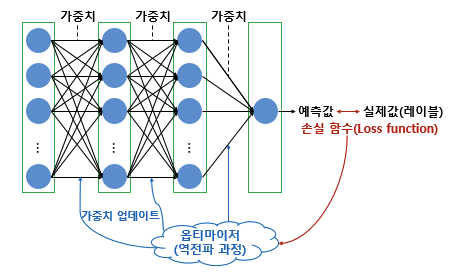
* 배치는 가중치 등의 매개변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다.

### 1. 배치 경사 하강법: Batch Gradient Descent

In [ ]:
model.fit(X_train, y_train, batch_size=len(X_train))

### 2. 배치 크기가 1인 확률적 경사 하강법: Stochastic Gradient Descent, SGD
* 배치 경사 하강법은 전체 데이터에 대해 계산을 하다보니 시간이 너무 오래 걸린다는 단점이 있었습니다.
* 배치 크기가 1인 확률적 경사 하강법은 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다.
* 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

    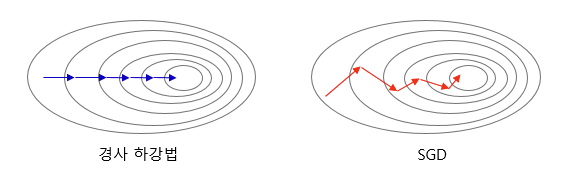

In [ ]:
model.fit(X_train, y_train, batch_size=1)

### 3. 미니 배치 경사 하강법: Mini-Batch Gradient Descent
* 전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다.
* 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다.

In [ ]:
model.fit(X_train, y_train, batch_size=128)

## 3. 옵티마이저: Optimizer

### 1. 모멘텀: Momentum
* 모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다.
* 물리학의 관성 법칙을 응용하여 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

    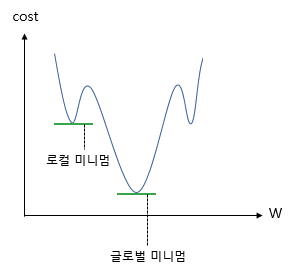

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

### 2. 아마그라드: Adagrad
* 모든 매개변수에 동일한 학습률을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다.
* 변화가 많은 매개변수는 학습률이 작게 설정되고, 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

### 3. 알엠에스프롭: RMSprop
* 아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서 학습률이 지나치게 떨어진다는 단점이 있었습니다.
* 이를 다른 수식으로 대체하여 이러한 단점을 개선한게 RMSprop입니다.

In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

### 4. 아담: Adam
* 알엠에스프롭과 모멘텀 두 가지를 합친 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

### 5. 사용 방법
* optimizer='sgd', optimizer='rmsprop'와 같이 각 옵티마이저를 문자열로 호출할 수 있습니다. 케라스의 옵티마이저 사용법은 아래의 링크에서 좀 더 상세히 확인할 수 있습니다.
* 링크 : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
# 단순히 'adam'으로 작성하더라도 동작합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## 4. 역전파: BackPropagation
## 5. 에포크와 배치 크기와 이터레이션: Epochs and Batch size and Iteration
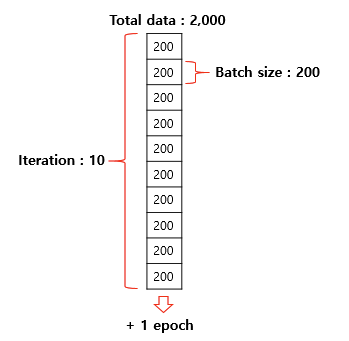
### 1. 에포크: Epoch
* 에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다.
* 이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.
### 2. 배치 크기: Batch size
* 배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다.
* 여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다. 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 배치의 수를 이터레이션이라고 합니다.
### 3. 이터레이션(Iteration) 또는 스텝(Step)
* 이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다. 또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다.
* 이터레이션은 스텝(Step)이라고 부르기도 하므로 두 용어 모두 기억해둡시다.